### Part 1: Data Preparation and Exploration

1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
    
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
    
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.


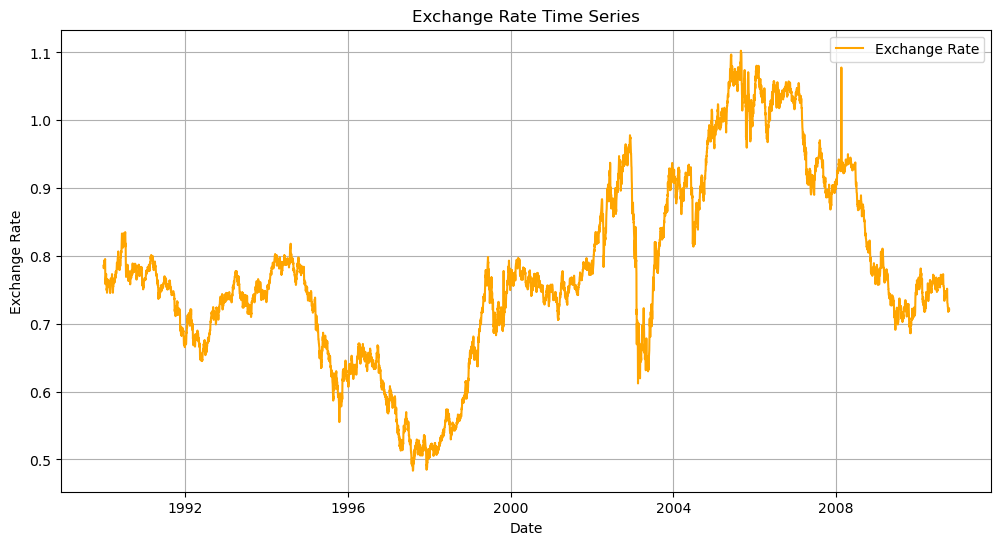

Missing Values:
 Ex_rate    0
dtype: int64

Statistical Summary:
            Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset and parse the date column
exchange_rate_df = pd.read_csv(r"D:\Assignments\Timeseries\exchange_rate.csv")

# Parse the 'date' column to datetime and set it as the index
exchange_rate_df['date'] = pd.to_datetime(exchange_rate_df['date'], format='%d-%m-%Y %H:%M')
exchange_rate_df.set_index('date', inplace=True)

# Step 2: Initial Exploration - Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate_df.index, exchange_rate_df['Ex_rate'], label='Exchange Rate', color='orange')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Data Preprocessing
# Check for missing values
missing_values = exchange_rate_df.isnull().sum()

# Display statistics to identify anomalies
stats_summary = exchange_rate_df.describe()

# Print results
print("Missing Values:\n", missing_values)
print("\nStatistical Summary:\n", stats_summary)


In [3]:
# To Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Part 2: Model Building - ARIMA

1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.


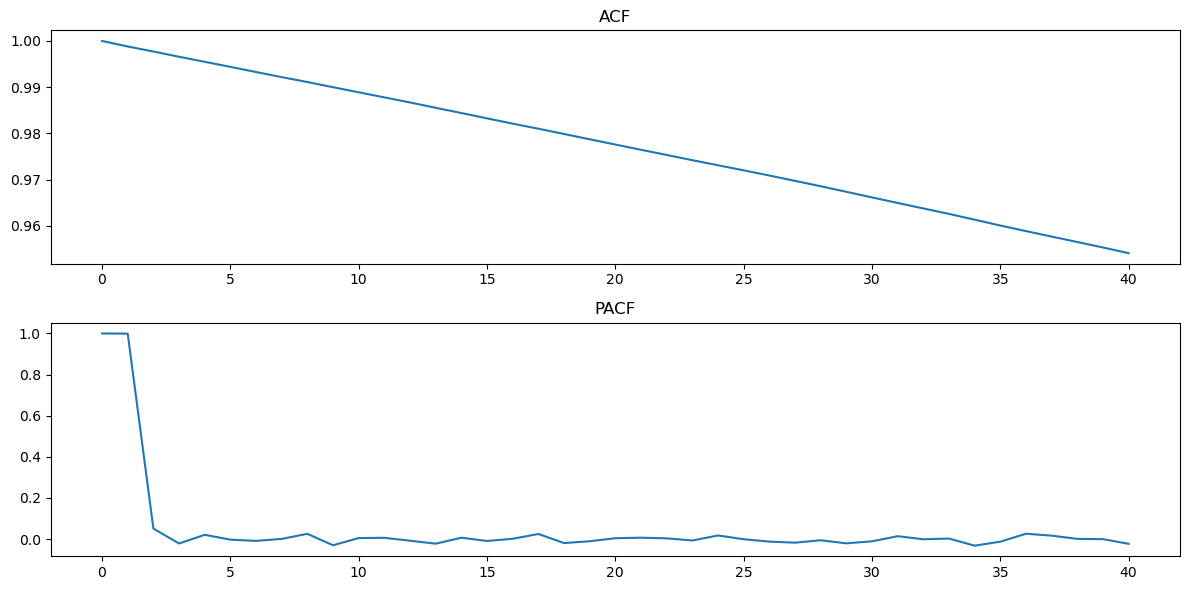

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(2, 1, 2)   Log Likelihood               22719.213
Date:                Tue, 07 Jan 2025   AIC                         -45428.426
Time:                        11:45:04   BIC                         -45394.871
Sample:                    01-01-1990   HQIC                        -45416.780
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3948      1.192     -0.331      0.740      -2.730       1.941
ar.L2          0.1443      0.648      0.223      0.824      -1.125       1.414
ma.L1          0.3376      1.192      0.283      0.7

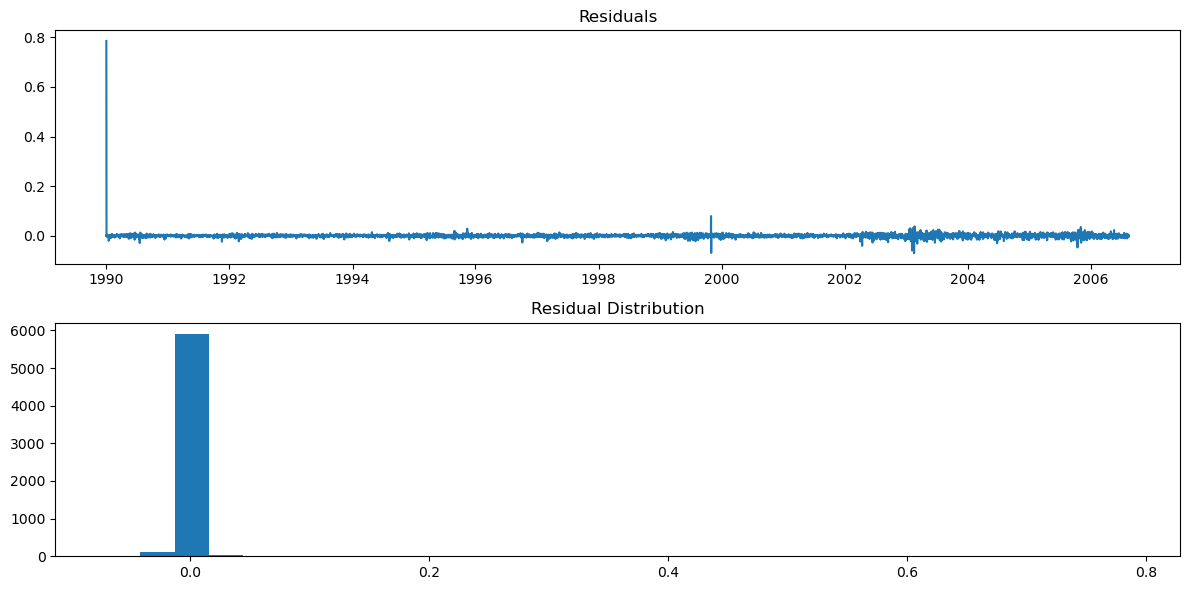

Root Mean Squared Error (RMSE): 0.20542502367030782


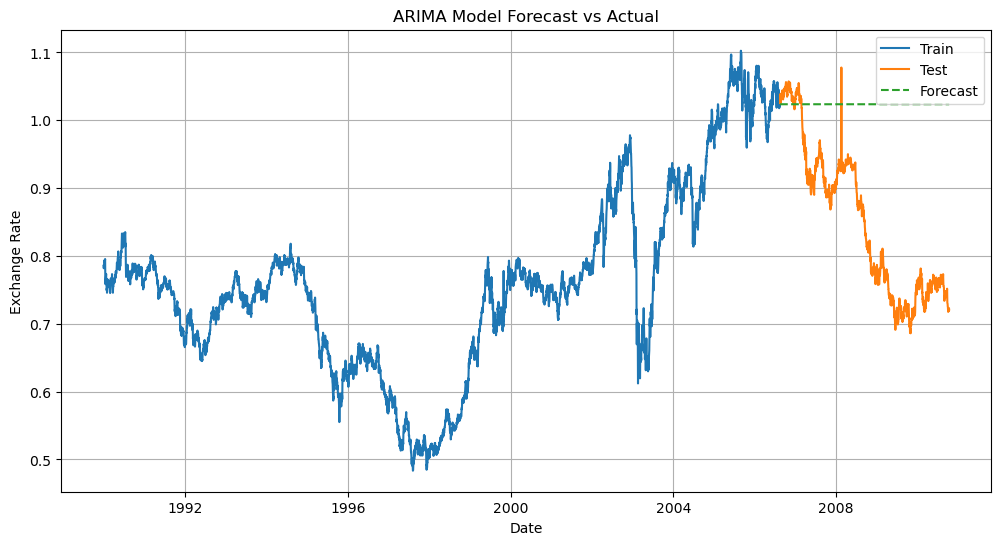

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset and parse the date column
file_path = 'D:\\Assignments\\Timeseries\\exchange_rate.csv'
exchange_rate_df = pd.read_csv(file_path)

# Parse the 'date' column to datetime and set it as the index
exchange_rate_df['date'] = pd.to_datetime(exchange_rate_df['date'], format='%d-%m-%Y %H:%M')
exchange_rate_df.set_index('date', inplace=True)

# Ensure the datetime index has an explicit frequency
exchange_rate_df.index = pd.to_datetime(exchange_rate_df.index).to_period('D').to_timestamp()

# Step 2: Data splitting
train_size = int(len(exchange_rate_df) * 0.8)
train, test = exchange_rate_df['Ex_rate'][:train_size], exchange_rate_df['Ex_rate'][train_size:]

# Step 3: ACF and PACF plots for parameter selection
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(acf(train, nlags=40))
plt.title('ACF')
plt.subplot(212)
plt.plot(pacf(train, nlags=40))
plt.title('PACF')
plt.tight_layout()
plt.show()

# Step 4: Fit ARIMA model
# Using parameters based on the ACF and PACF analysis
p, d, q = 2, 1, 2  # Initial parameters based on your output
model = ARIMA(train, order=(p, d, q))
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

# Step 5: Residual diagnostics
residuals = fitted_model.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.hist(residuals, bins=30)
plt.title('Residual Distribution')
plt.tight_layout()
plt.show()

# Step 6: Forecasting
forecast = fitted_model.forecast(steps=len(test))
forecast_index = test.index

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Step 7: Visualize actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


### Part 3: Model Building - Exponential Smoothing

1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.


Best Parameters: {'smoothing_level': 0.8, 'smoothing_slope': 0.7000000000000001}
Best RMSE: 0.05155349934014002


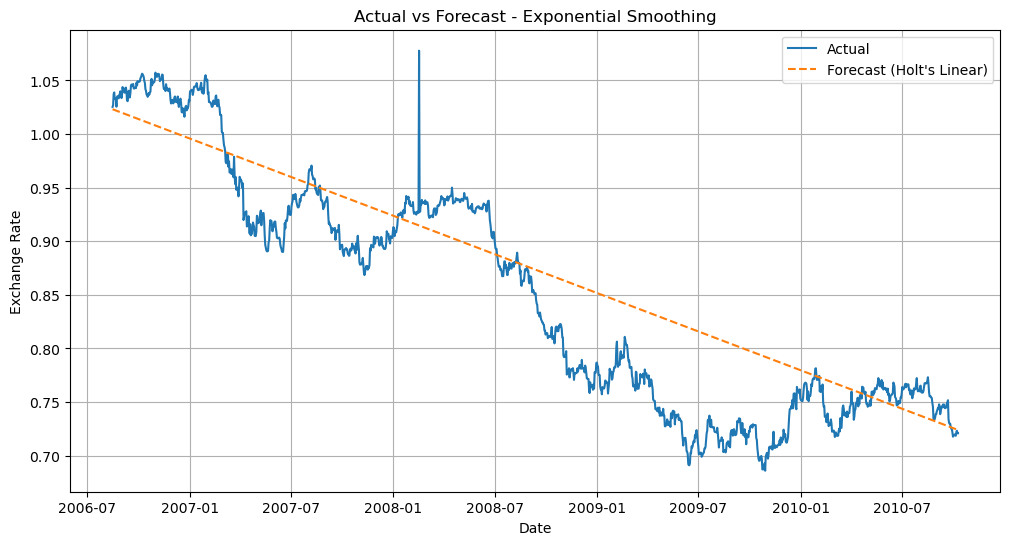

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset and parse the date column
file_path = 'D:\\Assignments\\Timeseries\\exchange_rate.csv'
exchange_rate_df = pd.read_csv(file_path)

# Parse the 'date' column to datetime and set it as the index
exchange_rate_df['date'] = pd.to_datetime(exchange_rate_df['date'], format='%d-%m-%Y %H:%M')
exchange_rate_df.set_index('date', inplace=True)

# Ensure the datetime index has an explicit frequency
exchange_rate_df.index = pd.to_datetime(exchange_rate_df.index).to_period('D').to_timestamp()

# Step 2: Split the data into training and testing sets
train_size = int(len(exchange_rate_df) * 0.8)
train, test = exchange_rate_df['Ex_rate'][:train_size], exchange_rate_df['Ex_rate'][train_size:]

# Step 3: Parameter Optimization (Manual Grid Search)
# Try different values of smoothing_level and smoothing_slope for Holt's Linear Trend Model
best_model = None
best_rmse = float('inf')
best_params = {}

for smoothing_level in np.arange(0.1, 1.1, 0.1):
    for smoothing_slope in np.arange(0.1, 1.1, 0.1):
        try:
            model = ExponentialSmoothing(train, trend="add", seasonal=None)
            fit = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
            forecast = fit.forecast(len(test))
            rmse = np.sqrt(mean_squared_error(test, forecast))
            if rmse < best_rmse:
                best_rmse = rmse
                best_model = fit
                best_params = {'smoothing_level': smoothing_level, 'smoothing_slope': smoothing_slope}
        except:
            continue

# Print the best parameters and RMSE
print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

# Step 4: Model Fitting and Forecasting
# Use the best model for forecasting
forecast = best_model.forecast(len(test))

# Plot the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast (Holt\'s Linear)', linestyle='--')
plt.title('Actual vs Forecast - Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


### Part 4: Evaluation and Comparison

1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


ARIMA Model Evaluation:
Mean Absolute Error (MAE): 0.1777
Root Mean Squared Error (RMSE): 0.2054
Mean Absolute Percentage Error (MAPE): 22.7966%

Exponential Smoothing Model Evaluation:
Mean Absolute Error (MAE): 0.1903
Root Mean Squared Error (RMSE): 0.2201
Mean Absolute Percentage Error (MAPE): 24.4136%

Model Comparison:
                   Model       MAE      RMSE       MAPE
0                  ARIMA  0.177699  0.205425  22.796642
1  Exponential Smoothing  0.190280  0.220093  24.413565


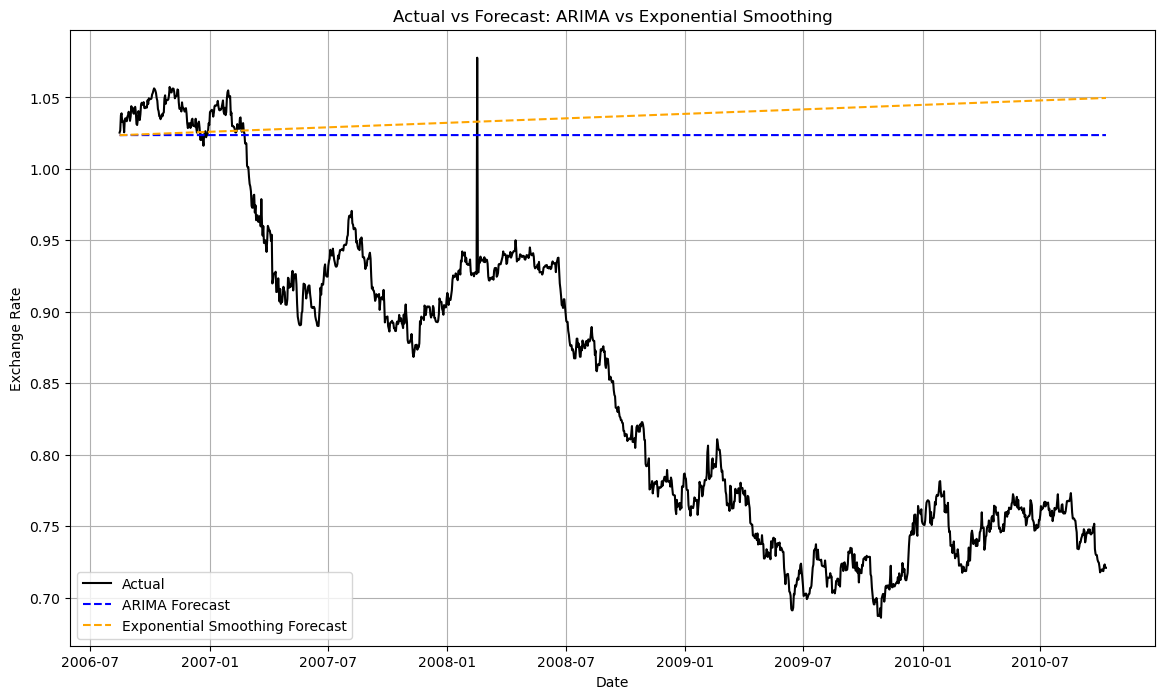

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Step 1: Fit the Exponential Smoothing Model
exp_model = ExponentialSmoothing(
    train,
    trend="add",  # Modify based on the data's trend
    seasonal=None,  # Use 'add', 'mul', or None based on the data
    damped_trend=False
).fit()

# Step 2: Forecast using Exponential Smoothing
exp_forecast = exp_model.forecast(steps=len(test))  # Match test data length
exp_forecast = pd.Series(exp_forecast, index=test.index)

# Step 3: Compute Error Metrics for ARIMA
arima_mae = mean_absolute_error(test, forecast)
arima_rmse = np.sqrt(mean_squared_error(test, forecast))
arima_mape = mean_absolute_percentage_error(test, forecast)

print("ARIMA Model Evaluation:")
print(f"Mean Absolute Error (MAE): {arima_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {arima_rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {arima_mape:.4f}%")

# Step 4: Compute Error Metrics for Exponential Smoothing
exp_mae = mean_absolute_error(test, exp_forecast)
exp_rmse = np.sqrt(mean_squared_error(test, exp_forecast))
exp_mape = mean_absolute_percentage_error(test, exp_forecast)

print("\nExponential Smoothing Model Evaluation:")
print(f"Mean Absolute Error (MAE): {exp_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {exp_rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {exp_mape:.4f}%")

# Step 5: Model Comparison
comparison_df = pd.DataFrame({
    "Model": ["ARIMA", "Exponential Smoothing"],
    "MAE": [arima_mae, exp_mae],
    "RMSE": [arima_rmse, exp_rmse],
    "MAPE": [arima_mape, exp_mape]
})

print("\nModel Comparison:")
print(comparison_df)

# Step 6: Visualization of Results
plt.figure(figsize=(14, 8))

plt.plot(test.index, test, label='Actual', color='black')
plt.plot(test.index, forecast, label='ARIMA Forecast', linestyle='--', color='blue')
plt.plot(test.index, exp_forecast, label='Exponential Smoothing Forecast', linestyle='--', color='orange')

plt.title('Actual vs Forecast: ARIMA vs Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()
